### Please fill this part


1.   Full Name: mahdi manouchehri
2.   Student Number: 400211592


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

# Support Vector Machine (SVM)- (30+5pts)

In [1]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.

In [2]:
df = pd.read_csv('C:/Users/jahannama/Downloads/Heart_Disease_Dataset.csv')

### Pre-Processing - (3pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  (1190, 12)
Number of rows with at least 1 NA value:  0
ballanced: True
--------------------- Plots --------------------------


sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

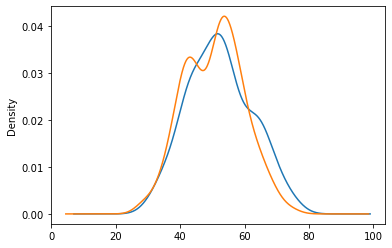

In [4]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
df.notnull()
new_dataset = df.dropna(axis = 0, how ='any') 
print("Number of rows with at least 1 NA value: ", (len(df)-len(new_dataset)))

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################

X=df.drop(['target'],axis=1)
y=df['target']
one=0
zero=0

for i in y :
    if i ==1:
        one+=1
    else:
        zero+=1
            
if one - zero < 100:
    print("ballanced: True")
else:
    print("ballanced: False")

    

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Plots --------------------------")

df1 = df[df['target'] == 0]
df1.groupby('sex').age.plot(kind='kde',label=True)


sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

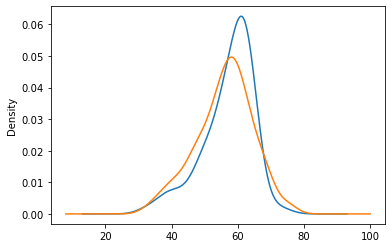

In [5]:
df2 = df[df['target'] == 1]
df2.groupby('sex').age.plot(kind='kde')

#### Question 1: What do you conclude from the plots?(2pts)
#### Answer: It is more common in older people and men

#### Outlier Detection & Removal (3pts):
We will filter ouliers using Z-test.

# 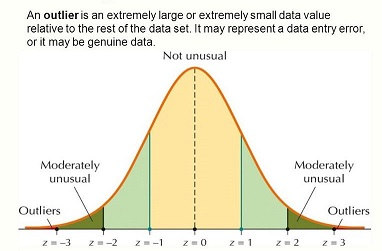

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [6]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
dataset=df
columns = ["age","resting_bp_s","cholesterol","max_heart_rate"]
threshold = 3
upper = dataset.age.mean() + 3*dataset.age.std()
lower = dataset.age.mean() -3*dataset.age.std()
dataset= dataset[(dataset.age<upper) & (dataset.age>lower)]
####
dataset.columns = [c.replace(' ', '_') for c in dataset.columns]
upper = dataset.resting_bp_s.mean() + 3*dataset.resting_bp_s.std()

lower = dataset.resting_bp_s.mean() -3*dataset.resting_bp_s.std()
dataset= dataset[(dataset.resting_bp_s<upper) & (dataset.resting_bp_s>lower)]
####
upper = dataset.cholesterol.mean() + 3*dataset.cholesterol.std()

lower = dataset.cholesterol.mean() -3*dataset.cholesterol.std()
dataset= dataset[(dataset.cholesterol<upper) & (dataset.cholesterol>lower)]
####
upper = dataset.max_heart_rate.mean() + 3*dataset.max_heart_rate.std()

lower = dataset.max_heart_rate.mean() -3*dataset.max_heart_rate.std()
dataset= dataset[(dataset.max_heart_rate<upper) & (dataset.max_heart_rate>lower)]
shape=dataset.shape
print(shape)
df=dataset
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

(1173, 12)


#### Feature Engineering(2pts):
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [7]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################

columns = ["age", "resting_bp_s", "cholesterol", "max_heart_rate", "oldpeak"]
for col in columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
dataset=df
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### SVM - (18pts)

#### spliting data

In [8]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [9]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    score = 0
    for i in range(len(y_true)):
        if y_pred[i] == int(y_true[i]):
            score += 1
        else:
            continue
    Accuracy = (score/len(y_true))*100
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(y_true)):

        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == -1 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_pred[i] == -1:
            fn += 1
    Precision = (tp / (tp + fp)) * 100
    Recall = (tp / (tp + fn)) * 100
    F1score = 2 * ((Precision * Recall) / (Precision + Recall))
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [10]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# linear kernel
y_pred=[]
clf = SVC(gamma='auto' , kernel= 'linear' )
clf.fit(X_train, y_train)
SVC()
for i in range (len (X_test)):
    y_pred.append(int(clf.predict([X_test[i]])))

print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))



# polynomial kernel
best_accuracy=0
degrees=np.linspace(1,20,20)
for deg in degrees :
    y_pred = []

    clf = SVC( C=1 , degree=deg , gamma='auto' , kernel= 'poly' )
    clf.fit(X_train, y_train)
    SVC()
    for i in range (len (X_test)):
        y_pred.append(int(clf.predict([X_test[i]])))
    results=classification_report(y_test, y_pred)
    #print("results of sklearn svm polynomial kernel:", results)
    if results[0] > best_accuracy :
        best_accuracy = results[0]
        best_result=results
        best_degree = deg

print('best_result_for_poly', best_result )
print('best_degree',best_degree)


# rbf kernel
breaker = False
c_range=np.logspace(-3,5,9)
gamma_range=np.logspace(-3,5,9)
for c in c_range :
    for g in gamma_range:
        y_pred=[]
        clf = SVC( C=50 , gamma=18 , kernel= 'rbf' )
        clf.fit(X_train, y_train)
        SVC()
        for i in range (len (X_test)):
            y_pred.append(int(clf.predict([X_test[i]])))
        results=classification_report(y_test, y_pred)
        print("results of sklearn svm RBF kernel:", results)
        if results[0] > 90 :
            result_with_90_accuracy_at_least = results
            gamma_=g
            c_=c
            breaker = True
            break
    if breaker :
        break
print('result_with_90_accuracy_at_least_for_rbf',result_with_90_accuracy_at_least)
print('gamma:',gamma_)
print('c',c_)#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel: (78.69318181818183, 77.56410256410257, 75.15527950310559, 76.34069400630915)
best_result_for_poly (88.06818181818183, 91.0344827586207, 81.98757763975155, 86.27450980392156)
best_degree 14.0
results of sklearn svm RBF kernel: (94.0340909090909, 92.6829268292683, 94.40993788819875, 93.53846153846155)
result_with_90_accuracy_at_least_for_rbf (94.0340909090909, 92.6829268292683, 94.40993788819875, 93.53846153846155)
gamma: 0.001
c 0.001


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [11]:

# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False


#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################
def linear_kernel(x_i, x_j):
    kernel_fn = np.dot(x_i, x_j)
    return kernel_fn

def polynomial_kernel(x_i, x_j, deg=5 , gamma=1):
    kernel_fn=(gamma * np.dot(x_i, x_j) + 1) ** deg
    return kernel_fn

def rbf_kernel(x_i, x_j, gamma=18):
    kernel_fn=np.exp(-gamma * np.dot(x_i - x_j, x_i - x_j))
    return kernel_fn




#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones(n_samples))
        # A = cvxopt.matrix(y, (1, n_samples))
        A = cvxopt.matrix(y.reshape(1, -1).astype(np.double))
        b = cvxopt.matrix(np.zeros(1))
        if self.C:
            G = cvxopt.matrix(np.vstack((-np.eye(n_samples),
                                         np.eye(n_samples))))
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples),
                                         np.ones(n_samples) * self.C)))
        else:
            G = cvxopt.matrix(-np.eye(n_samples))
            h = cvxopt.matrix(np.zeros(n_samples))
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        # this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b = 0
        for i in range(len(self.alpha)):
            self.b += self.sv_y[i]
            self.b -= np.sum(self.alpha * self.sv_y * K[ind[i], sv])
        if len(self.alpha > 0):
            self.b /= len(self.alpha)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for i in range(len(self.alpha)):
                self.w += self.alpha[i] * self.sv_y[i] * self.sv[i]
        else:
            self.w = None  # Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.sign(np.dot(X, self.w) + self.b)
        else:
            #####################################################################################
            ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
            #####################################################################################
            n=len(X)
            y_predict = np.zeros(n)
            for k in range(len(X)):
                s = 0
                x=zip(self.alpha, self.sv_y, self.sv)
                for lda, sv_y, sv in x:
                    s += lda * sv_y * self.kernel(X[k], sv)
                y_predict[k] = s

            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


In [12]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel
svc = MySVM(C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("results of MySVM linear kernel:", classification_report(y_test , y_pred))


# polynomial kernel
svc = MySVM(polynomial_kernel, C=50)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))


# rbf kernel
best_accuracy=0
c_range=np.logspace(-3,5,9)
for c in c_range:
    svc = MySVM(rbf_kernel, C=c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    #print('y_predrbf_kernel',y_pred)
    result=classification_report(y_test , y_pred)
    if result[0] > best_accuracy :
        best_accuracy = result[0]
        best_result=result
print("results of Mysvm RBF kernel:", best_result)

results of MySVM linear kernel: (79.26136363636364, 79.72972972972973, 73.29192546583852, 76.37540453074433)
results of MySVM polynomial kernel: (82.67045454545455, 85.71428571428571, 74.53416149068323, 79.73421926910298)
results of Mysvm RBF kernel: (94.0340909090909, 92.6829268292683, 94.40993788819875, 93.53846153846155)


#### Question 2: Report best results (2pts).



1.  Best kernel: RBF kernel
2.  Best Accuracy: 94.0340909090909




### Bonus Score - (5pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

#  Naïve Bayes and Bayes- (20pts)

In this section, you will complete the functions that you will use to answer the sections of the first question.

Note: `In general, functions should have the said operation, but you can change the inputs as desired`.

Note: In this question, we intend to predict heart patients from pre-prepared data (`Heart_Disease_Dataset.csv`). In this data, consider features that have more than 5 unique numbers continuously and consider the rest of the features as discrete.



## Questions:
Q1) First consider discrete features as independent and continuous features as a normal multivariate distribution. With this assumption, train the Bayesian classifier and report the F1-sⅽore, Aⅽⅽuraⅽy, Preⅽision and Reⅽaⅼⅼ metrics (using `classification_report` function) on the train and test data. 

Q2) Assume all the features are independent and train a Naïve Bayes classifier and report the mentioned metrics on the test data.`Consider the distribution of continuous variables to be normal`.

Q3) By plotting the normal distribution diagram obtained for each of the continuous variables in the previous section, check the effectiveness of each in the Naïve Bayes classifier and compare them with each other.

Q4) Assuming that classifying an unhealthy person `(target==1)` in the healthy category costs twice as much, retrain the Naïve Bayes classifier and compare the Aⅽⅽuraⅽy metric with the part `2`.

### Note : Now answer the questions in parts 1 to 4 using following functions

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy 
%matplotlib inline

The `normal_param` function takes as input a DataFrame whose all columns have continuous values and returns the columns of the multivariate normal distribution parameters 

In [25]:
def normal_params(df):
    #train = df[:int(len(df) * 0.7)]
    X = df.drop(columns=['target'])
    y = df['target']
    m1 = y == -1
    X1 = X[m1].to_numpy()
    m2 = y == 1
    X2 = X[m2].to_numpy()
    p1 = len(X1) / len(X)
    p2 = len(X2) / len(X)
    avg0 = np.sum(X1, axis=0) / len(X1)
    avg1 = np.sum(X2, axis=0) / len(X2)
    s1 = np.dot((X1 - avg0).T, (X1 - avg0)) / len(X1)
    s2 = np.dot((X2 - avg1).T, (X2 - avg1)) / len(X2)
    return p1, p2, avg0, avg1, s1, s2


The following function `p_x_normal` returns the probability of seeing that vector by taking a vector of continuous features and normal multivariate distribution parameters.

In [26]:

def p_x_normal(x, params):
    p0, p1, m0, m1, s0, s1 = params

    arg = np.exp(-0.5 * np.dot(np.dot((np.array(x) - m0).T, np.linalg.inv(s0)), (np.array(x) - m0)))
    A = 1 / ((2 * np.pi) ** (m0.shape[0]) * (np.linalg.det(s0))) ** 0.5

    normal_p1 = A * arg

    arg2 = np.exp(-0.5 * np.dot(np.dot((np.array(x) - m1).T, np.linalg.inv(s0)), (np.array(x) - m1)))
    A2 = 1 / ((2 * np.pi) ** (m1.shape[0]) * (np.linalg.det(s1))) ** 0.5

    normal_p2 = A2 * arg2

    p_c0 = p0 * normal_p1
    p_c1 = p1 * normal_p2
    return p_c0, p_c1

The `cat_params` function, by taking a DataFrame and name of a discrete column from it, returns the probability of seeing each of its unique values.

In [27]:

def cat_params(df, col):
    keys = df[col].unique()
    n = len(df)
    dic = {}
    for key in keys:
        dic[key] = len(df[df[col] == key])/n

    return dic


The `p_x_cat` function returns the probability of being seen by taking a vector of discrete features and a DataFrame.

In [28]:

def p_x_cat(df, x):
    columns = df.columns
    p = 1
    for col in columns:
        dic = cat_params(df, col)
        if x[col] in dic.keys():
            p *= dic[x[col]]
        else:
            p *= 0
            return 0

    return p


The `p_x_multivariate` function returns the probability of seeing that vector by taking a DataFrame, the parameters required for continuous and discrete distributions, and a vector of properties.

In [29]:
def p_x_multivariate(continuous_params, discrete_dics, discrete_columns, continuous_columns, x, ):
    x_discrete = x[discrete_columns]
    x_continuous = x[continuous_columns]

    dic0, dic1 = discrete_dics

    p_c0, p_c1 = p_x_normal(x_continuous, continuous_params)

    columns = dic0.keys()
    p = 1
    for col in columns:
        if x_discrete[col] in dic0[col].keys():
            p *= dic0[col][x_discrete[col]]
        else:
            p *= 0
    p_d0 = p

    columns1 = dic1.keys()
    p = 1
    for col in columns1:
        if x_discrete[col] in dic1[col].keys():
            p *= dic1[col][x_discrete[col]]
        else:
            p *= 0
    p_d1 = p

    return p_c0 * p_d0, p_c1 * p_d1


The following function takes a DataFrame and name of a continuous column as its input and returns the normal distribution parameters of that column.

In [30]:
def single_normal_param(X, col):
    X = X.loc[:, X.columns.intersection([col, 'target'])]
    #X.drop(X.columns.difference([col, 'target']), 1, inplace=True)

    return normal_params(X)


The following function takes a number and returns the probability of being seen according to its normal distribution parameters.

In [31]:

def p_single_normal(x, params):
    p0, p1, m0, m1, s0, s1 = params
    z = x - m0
    det = s0
    arg0 = np.exp(-0.5 * z * z / s0)
    A0 = 1 / ((2 * np.pi) * det) ** 0.5

    z = x - m1
    det = s1
    arg1 = np.exp(-0.5 * z * z / s1)
    A1 = 1 / ((2 * np.pi) * det) ** 0.5

    p = p0 * A0 * arg0, p1 * A1 * arg1
    return p



The following function is the same as before, but this time assuming the independence of all properties by taking a DataFrame, the parameters required for continuous and discrete distributions and a vector of featuress return the probability that that vector is seen in the output.

In [32]:
def p_x_single(continuous_dics, discrete_dics, discrete, x, ):
    x_discrete = x[discrete]
    dic0, dic1 = discrete_dics
    columns = continuous_dics.keys()
    p0 = 1
    p1 = 1
    for col in columns:
        p0, p1, m0, m1, s0, s1 = continuous_dics[col]
        z = x[col] - m0
        det = s0
        arg = np.exp(-0.5 * z * z / s0)
        A = 1 / ((2 * np.pi) * det) ** 0.5
        z1 = x[col] - m1
        det1 = s1
        arg1 = np.exp(-0.5 * z1 * z1 / s1)
        A1 = 1 / ((2 * np.pi) * det1) ** 0.5
        p_col0, p_col1 = p0 * A * arg, p1 * A1 * arg1
        p0 *= p_col0
        p1 *= p_col1
    p_c0, p_c1 = p0, p1

    columns = dic0.keys()
    p0 = 1
    for col in columns:
        if x_discrete[col] in dic0[col].keys():
            p0 *= dic0[col][x_discrete[col]]
        else:
            p0 *= 0
    p_d0 = p0
    columns = dic1.keys()
    p1 = 1
    for col in columns:
        if x_discrete[col] in dic1[col].keys():
            p1 *= dic1[col][x_discrete[col]]
        else:
            p1 *= 0
    p_d1 = p1
    return p_c0 * p_d0, p_c1 * p_d1


### Q1

In [33]:

df = pd.read_csv('C:/Users/jahannama/Downloads/Heart_Disease_Dataset.csv')


df.target.replace(0, -1, inplace=True)

train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

threshold=5
discrete = []
continuous = []
for col in train.columns:
    if len(train[col].unique()) > threshold:
        continuous.append(col)
    else:
        discrete.append(col)

discrete.remove('target')

train_y = train['target']
test_y = test['target']


train_continuous_X = train[continuous]
train_discrete_X = train[discrete]
test_continuous_X = test[continuous]
test_discrete_X = test[discrete]



df_continuous = train_continuous_X
df_continuous.insert(5, "target",train_y, True)
#df_continuous['target'] = train_y
continuous_params = normal_params(df_continuous)

t0 = train_y == -1
t1 = train_y == 1
dic_p1 = {}
columns = train_discrete_X[t0].columns
for col in columns:
    dic_p1[col] = cat_params(train_discrete_X[t0], col)
dic_1 = dic_p1

dic_p2 = {}
columns = train_discrete_X[t1].columns
for col in columns:
    dic_p2[col] = cat_params(train_discrete_X[t1], col)
dic_2 = dic_p2



ps = []
n = len(train)
for i in range(n):
    ps.append(p_x_multivariate(continuous_params,(dic_1, dic_2),discrete,continuous, train.iloc[i]))
ps_train =ps


ps1=[]
n=len(test)
for i in range (n):
    ps1.append(p_x_multivariate(continuous_params,(dic_1, dic_2),discrete,continuous, test.iloc[i]))
ps_test=ps1

classes1 = []
for p in ps:
    if p[0] > p[1]:
        classes1.append(-1)
    else:
        classes1.append(1)


classes2 = []
for p in ps1:
    if p[0] > p[1]:
        classes2.append(-1)
    else:
        classes2.append(1)

print('Train:', classification_report(train_y, np.array(classes1)))
print('Test:', classification_report(np.array(test_y), np.array(classes2)))





#############


Train: (84.03361344537815, 89.92805755395683, 80.47210300429185, 84.93771234428087)
Test: (80.11204481792717, 86.5079365079365, 66.87116564417178, 75.4325259515571)


### Q2

In [34]:

dic_continuous = {}
columns = train_continuous_X.columns
#columns.remove('target')
for col in columns:
    if col=='target':
        continue
    else:
        x=train_continuous_X
        dic_continuous[col] = single_normal_param(x, col)
p_continuous_dic =dic_continuous

t0 = train_y == -1
t1 = train_y == 1
dic_p0 = {}
columns = train_discrete_X[t0].columns

for col in columns:
    dic_p0[col] = cat_params(train_discrete_X[t0], col)

dic_0 = dic_p0

dic_p1 = {}
columns = train_discrete_X[t1].columns

for col in columns:
    dic_p1[col] = cat_params(train_discrete_X[t1], col)


dic_1 = dic_p1

ps = []
n = len(train)
for i in range(n):
    ps.append(p_x_single(p_continuous_dic,(dic_0, dic_1),discrete,train.iloc[i],)
    )

ps_train = ps

ps1 = []
n = len(test)
for i in range(n):
    ps1.append(p_x_single(p_continuous_dic,(dic_0, dic_1),discrete,test.iloc[i],)
    )

ps_test = ps1

classes1 = []
for p in ps:
    if p[0] > p[1]:
        classes1.append(-1)
    else:
        classes1.append(1)


classes2 = []
for p in ps1:
    if p[0] > p[1]:
        classes2.append(-1)
    else:
        classes2.append(1)

print('Train:', classification_report(train_y, np.array(classes1)))
print('Test:', classification_report(np.array(test_y), np.array(classes2)))


Train: (85.8343337334934, 85.65573770491804, 89.69957081545064, 87.63102725366876)
Test: (79.27170868347339, 76.33136094674556, 79.14110429447852, 77.71084337349397)


# Ensemble Learning- (20pts)

We want to implement forest Random. To train each tree in the forest, set the value of x to 'sqrt'. Then explain the reason for this decision? 

Note: must be use `bootstrap sampling`. 

Now increase the number of trees from 20 to 200. Draw the training and validation error according to the number of trees. `(Using bootstrap sampling library is not prohibited)`

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

The following function takes the features and the target vector and returns the trained decision tree using Sklearn.

In [36]:
def train_tree(X, y):
    tree = DecisionTreeClassifier(max_features='sqrt', criterion='entropy')
    tree.fit(X, y)
    return tree

The following function takes a random tree, a features vector, the target vector, and the decision result of the previous trees in the forest, and updates and returns the decision result. It also updates the error of the whole set so far.

In [37]:
n=10
df = pd.read_csv('C:/Users/jahannama/Downloads/Heart_Disease_Dataset.csv')
df_copy=df
df_copy.target.replace(0, -1, inplace=True)
train_df = df_copy[:int(len(df) * 0.7)]
test_df = df_copy[int(len(df) * 0.7):]
train_y = train_df['target']
test_y = test_df['target']
train_X = train_df.drop(columns=['target'])
test_X = test_df.drop(columns=['target'])


def bootstrap_sampling(X,y):
    n = len(X)
    idx = np.random.choice(np.arange(n), replace=True, size=n)
    X = X.iloc[idx]
    y = y.iloc[idx]
    return X, y
trees=[]




for i in range(n):
    X,y=bootstrap_sampling(train_X, train_y)
    tree = train_tree(train_X, train_y)
    trees.append(tree.predict(test_X))


sum=trees[0]
for i in range (1,n):
    sum=sum+trees[i]

    ypred =np.copy(sum)
    ypred [sum>1]=1
    ypred [sum<1]=-1
    print('ypred',ypred )
    print('Test:', classification_report(np.array(test_y), np.array(ypred )))



ypred [-1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1
 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1
 -1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1